In [1]:
import array
from array import array
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
from scipy.signal import find_peaks
import numpy as np
import math
from math import sqrt
import os

In [2]:
##установите корректный путь к данным в формате: "pathIn + "/" + prefix + {U} + postfix"
pathIn = "C:/Users/Nuclab/Desktop/Ускорители/5.1.2"
prefix = "5.2_" 
postfix = "_5.2_histo.txt"

#список точек по напряжению, при которых набирались данные
Ulist = ['54.00', '54.50', '55.00', '55.50', '56.00','56.50']
#установленное усиление на предусилителе
PSAUGAIN = '45' # in dB
#установка границ подгонки 0 и 1 пиков для каждой точки по напряжению
#peak0
FitXBoardLeftP0 = np.array([-150.,-150.,-150.,-150.,-150.,-150.,-150.])
FitXBoardRightP0 = np.array([200.,200.,200.,200.,240.,240.,240.])
#peak1
FitXBoardLeftP1 = np.array([250,500,900,1100,1050,1300,1300])
FitXBoardRightP1 = np.array([650,1300,1600,1750,1900,1850,2100])
 
#обработка набранных данных/или просто отрисовка
analysis = True
#подгонка двойным Гаусом, иначе одним
fitDoubleGauss = True

#установка границ отрисовки по шкале X
Xleft = -200
Xright = 2100

#имена сохраняемых файлов
outSpectr = 'V_spectr.png'   #"{U} + outSpectr"
outR = 'R_Bias.png'
outEff = 'Eff_Bias.png'
outmu = 'mu_Bias.png'
outGain = 'Gain_Bias.png'

#создание директории куда сохраняем результаты
pathOut = pathIn + '/' + 'results'
if not os.path.exists(pathOut):
    os.mkdir(pathOut)

In [3]:
#определение функций для подгонки данных
def Gauss(x, a, x0, s):
    return a*np.exp(-((x-x0)/s)**2)

def DoubleGauss(x, a1, x01, s1, a2, x02, s2):
    return Gauss(x, a1, x01, s1) + Gauss(x, a2, x02, s2)

def nGauss(x, *p):
    n = len(p)/3
    res = 0
    for i in range(n):
        res += Gauss(x, p[i*3], p[i*3+1], p[i*3+2])
    return res

def plotAllGauss(x, p):
    n = len(p)//3
    for i in range(n):
        plt.plot(x, Gauss(x,p[i*3],p[i*3+1],p[i*3+2]), 'b', linewidth=0.5)

Анализируем данные из файла: C:/Users/Nuclab/Desktop/Ускорители/5.1.2/5.2_54.00_5.2_histo.txt
The index is not in the range of elements. Check the data in the file
Колличество найденных пиков n_peaks = 5
Положение пиков на оси X: [   3.521  475.531  955.541 1419.55  1883.56 ]
0 пик: Параметры гауссианов:  [1.59207495e+04 3.71114150e-01 3.89233005e+01 1.28364240e+02
 4.53140450e+01 1.14902243e+02]
Стандартное отклонение:  41.25713251492174
Квадрат коэффициента корреляции:  0.9999335366832914
1 пик: Параметры гауссианов:  [8631.21529552  466.99441909   69.2923568  9030.19458178  478.60844559
   51.50709308]
Стандартное отклонение:  71.25023863989507
Квадрат коэффициента корреляции:  0.999862583439001
mean0= 0.3711141495186957 +- 0.0543739445127358  sigma0= 38.923300474251356 +- 0.10093856712010409
mean1= 478.60844558610654 +- 1.0443220419802721  sigma1= 51.507093079401685 +- 2.076332425702287
R= 14.176874273842326  Gain= 672331.5367888674 +- 1544.6053925644899
Eff= 81.56840861344537 +- 1

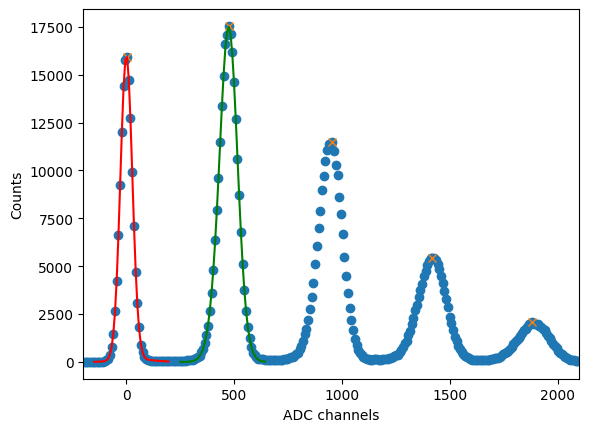

Анализируем данные из файла: C:/Users/Nuclab/Desktop/Ускорители/5.1.2/5.2_54.50_5.2_histo.txt
Колличество найденных пиков n_peaks = 6
Положение пиков на оси X: [3.521000e+00 7.475360e+02 1.507552e+03 2.259568e+03 3.003583e+03
 3.747599e+03]
0 пик: Параметры гауссианов:  [6.20428808e+03 6.00854815e-01 3.95653935e+01 6.71417219e+01
 5.24576030e+01 9.77501555e+01]
Стандартное отклонение:  26.916978886454583
Квадрат коэффициента корреляции:  0.9998159243672676
1 пик: Параметры гауссианов:  [3871.51275727  758.54064586   50.02801727 6434.39330233  745.83154834
   67.71232706]
Стандартное отклонение:  53.79969922710898
Квадрат коэффициента корреляции:  0.9997044780630308
mean0= 0.6008548149942958 +- 0.1003767143179755  sigma0= 39.56539349687535 +- 0.19372553711782875
mean1= 758.5406458569255 +- 2.2060804410181616  sigma1= 50.028017269382524 +- 4.17488685191925
R= 24.755765957378845  Gain= 1065552.1662725396 +- 3242.5404330662154
Eff= 92.20817283537096 +- 0.7366158655724888  mu= 2.55209480102

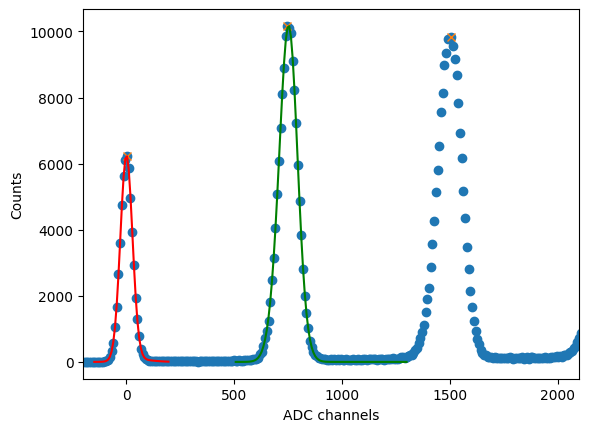

Анализируем данные из файла: C:/Users/Nuclab/Desktop/Ускорители/5.1.2/5.2_55.00_5.2_histo.txt
Колличество найденных пиков n_peaks = 7
Положение пиков на оси X: [-4.479000e+00  9.955420e+02  1.995562e+03  2.995583e+03  3.979604e+03
  4.987625e+03  5.971645e+03]
0 пик: Параметры гауссианов:  [2.90889869e+03 1.60181190e-01 3.94501132e+01 2.28135637e+01
 1.09345360e+02 9.35532263e+01]
Стандартное отклонение:  21.577569399903336
Квадрат коэффициента корреляции:  0.9994535276537162
1 пик: Параметры гауссианов:  [1070.31457152 1007.86987974   47.42521824 4640.93711915  992.81243452
   67.22134828]
Стандартное отклонение:  34.70776041829991
Квадрат коэффициента корреляции:  0.999681643309754
mean0= 0.16018118979386275 +- 0.17288276954104098  sigma0= 39.45011323429272 +- 0.3183385459057783
mean1= 1007.8698797441838 +- 5.998965746836019  sigma1= 47.42521823509162 +- 10.85827368705628
R= 38.28414885850909  Gain= 1416692.018230607 +- 8676.713683933915
Eff= 96.19111491067743 +- 0.3459406874594748  

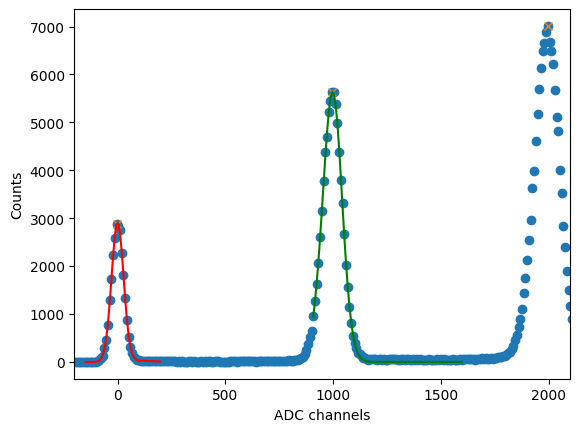

Анализируем данные из файла: C:/Users/Nuclab/Desktop/Ускорители/5.1.2/5.2_55.50_5.2_histo.txt
Колличество найденных пиков n_peaks = 8
Положение пиков на оси X: [-4.479000e+00  1.251547e+03  2.507573e+03  3.763599e+03  5.011625e+03
  6.259651e+03  7.515677e+03  8.787704e+03]
0 пик: Параметры гауссианов:  [ 1.41898634e+03  9.02204538e-01  4.17155615e+01  1.96885216e+02
 -3.22695154e+00  1.61121954e+01]
Стандартное отклонение:  12.348270125735276
Квадрат коэффициента корреляции:  0.9993886213587525
1 пик: Параметры гауссианов:  [3121.81369286 1252.57449692   70.44637695  216.08442835 1275.52160091
   23.51351542]
Стандартное отклонение:  29.9218146747933
Квадрат коэффициента корреляции:  0.9992536746299936
mean0= -3.226951539243527 +- 0.8684335559175855  sigma0= 16.112195375805587 +- 2.1037727977549907
mean1= 1275.5216009061946 +- 2.549475436694926  sigma1= 23.51351541774464 +- 4.801856133750177
R= 74.66929146080237  Gain= 1797732.8889185209 +- 4805.078680714327
Eff= 97.8482338230697 +- 0

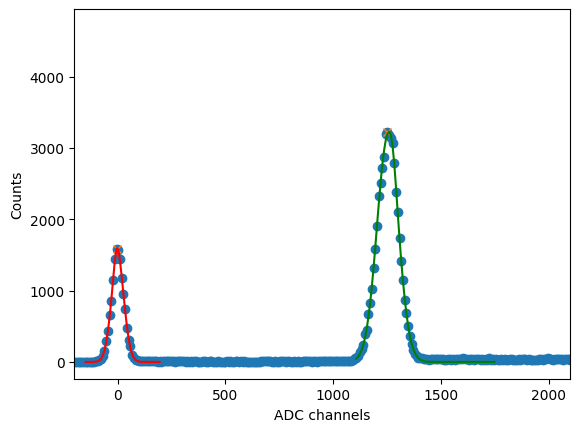

Анализируем данные из файла: C:/Users/Nuclab/Desktop/Ускорители/5.1.2/5.2_56.00_5.2_histo.txt
Колличество найденных пиков n_peaks = 9
Положение пиков на оси X: [3.5210000e+00 1.5235530e+03 3.0275840e+03 4.5316150e+03 6.0356470e+03
 7.5476780e+03 9.0837100e+03 1.0555741e+04 1.0603742e+04]
0 пик: Параметры гауссианов:  [8.25870797e+02 1.01592064e+00 4.22466065e+01 7.78601114e+01
 6.33140085e-01 1.38932609e+01]
Стандартное отклонение:  6.442469988540001
Квадрат коэффициента корреляции:  0.9994682424983915
1 пик: Параметры гауссианов:  [1853.45560968 1510.13007328   74.98362833   21.55178808 1803.76742334
  500.        ]
Стандартное отклонение:  17.316966313387745
Квадрат коэффициента корреляции:  0.9989852903108164
mean0= 0.6331400848826483 +- 1.0201121593535851  sigma0= 13.893260903344082 +- 2.324379319323112
mean1= 1510.1300732821276 +- 0.22016494689470972  sigma1= 74.98362833417102 +- 0.38062658711839853
R= 20.485729961046857  Gain= 2122131.264462266 +- 1743.6476788272937
Eff= 98.60520

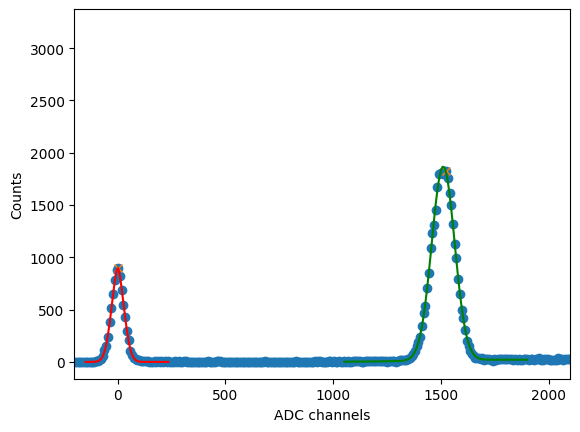

Анализируем данные из файла: C:/Users/Nuclab/Desktop/Ускорители/5.1.2/5.2_56.50_5.2_histo.txt
Колличество найденных пиков n_peaks = 14
Положение пиков на оси X: [-4.4790000e+00  1.8035580e+03  3.6435970e+03  5.4356340e+03
  5.4516340e+03  7.2596720e+03  9.0597100e+03  9.0837100e+03
  1.0891748e+04  1.0923748e+04  1.2683785e+04  1.2707786e+04
  1.2747786e+04  1.2763787e+04]
0 пик: Параметры гауссианов:  [9.64582138e+01 5.12422666e+00 2.22019467e+01 4.62351251e+02
 2.57639524e-01 4.43887801e+01]
Стандартное отклонение:  9.839862905730815
Квадрат коэффициента корреляции:  0.9965965497969324
1 пик: Параметры гауссианов:  [2086.78527827 2639.42803932  148.28736702 1139.80990749 1817.50872031
   83.62457829]
Стандартное отклонение:  13.827844212425209
Квадрат коэффициента корреляции:  0.9986894024048968
mean0= 5.124226660934872 +- 2.052189148026196  sigma0= 22.20194672275383 +- 5.828476130208874
mean1= 1817.5087203117753 +- 0.797539664030003  sigma1= 83.62457828864636 +- 0.9703868797121051
R

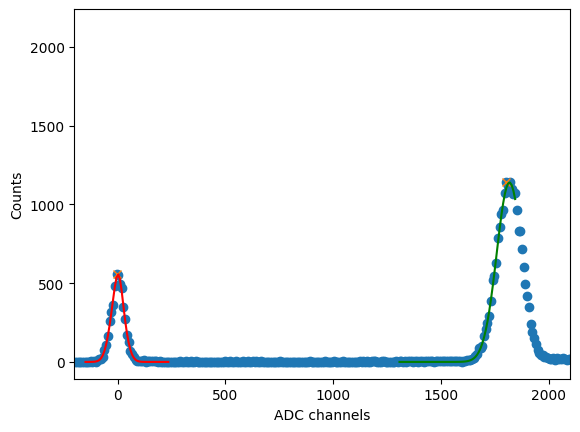

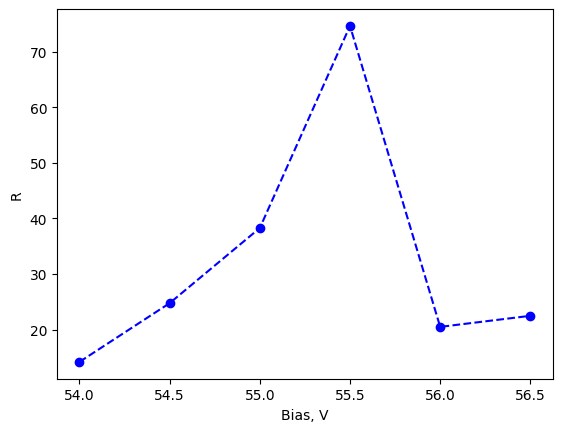

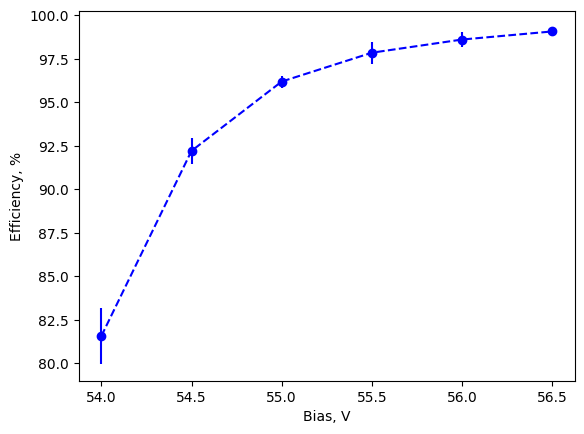

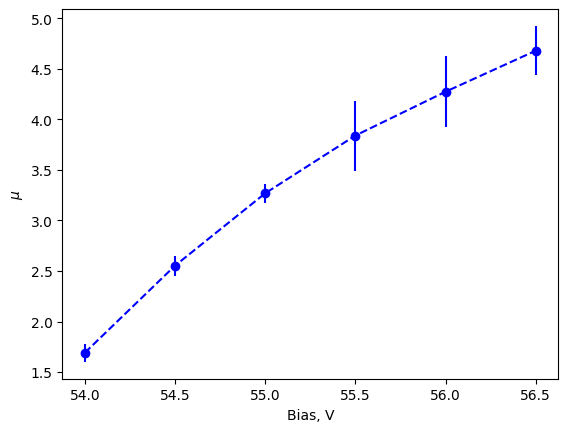

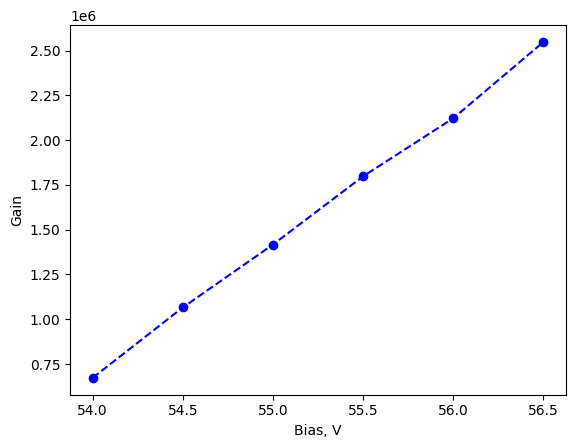

In [4]:
Uarray,Rarray,Gainarray,errGainarray,Effarray,errEffarray,muarray,errmuarray = np.array([]),np.array([]),np.array([]),np.array([]),np.array([]),np.array([]),np.array([]),np.array([])

for U in Ulist:
    try:
        fileName = pathIn + "/" + prefix + U + postfix
        print('Анализируем данные из файла:',fileName)
        file = open(fileName)        
    
        x,y = np.array([]), np.array([])
    
        for line in file.readlines():
            line = line.replace(',','.')
            j = line.split()
            j[0] = float(j[0])
            j[1] = float(j[1])
            x = np.append(x, j[0])
            y = np.append(y, j[1])
    except FileNotFoundError:
        print('Can`t open the file',fileName,'. No such file or directory')
    except ValueError:
        print('It`s not a number. Check the data in the file')
    except IndexError:
        print('The index is not in the range of elements. Check the data in the file')
            
    plt.plot(x, y,'o')  
    #plt.bar(x, y, width=8.0)  
    plt.xlabel('ADC channels')
    plt.ylabel('Counts')
    
    if analysis:
        plt.xlim([Xleft, Xright])  
        # Find peaks
        thresh_top    = np.median(y) + 1.0 * np.std(y)
        i_peaks, _ = find_peaks(y,  height =  thresh_top, width=2)
        print('Колличество найденных пиков n_peaks =',len(i_peaks))
        print('Положение пиков на оси X:',x[i_peaks])
        plt.plot(x[i_peaks], y[i_peaks], 'x')
        
        #подгонка 0 пика
        peak0 = x[i_peaks][0]
        x0 = x[(x>FitXBoardLeftP0[Ulist.index(U)]) & (x<FitXBoardRightP0[Ulist.index(U)])]
        y0 = y[(x>FitXBoardLeftP0[Ulist.index(U)]) & (x<FitXBoardRightP0[Ulist.index(U)])]
        top = peak0+FitXBoardRightP0[Ulist.index(U)]
        if fitDoubleGauss:
            init_valsp0 = [.025, peak0, 3., .025, peak0, 3.]
            set_boundsp0 = ([0., -150., 0., 0., -150., 0.], [50000., top, 500., 50000., top, 500.]) 
            p0, cov0 = curve_fit(DoubleGauss, x0, y0, p0=init_valsp0, bounds=set_boundsp0)
            fit_y0 = DoubleGauss(x0, *p0)
        else:
            init_valsp0 = [.025, peak0, 3.]
            set_boundsp0 = ([0., -150., 0.], [50000., top, 500.]) 
            p0, cov0 = curve_fit(Gauss, x0, y0, p0=init_valsp0, bounds=set_boundsp0)
            fit_y0 = Gauss(x0, *p0)    
        
        plt.plot(x0, fit_y0, 'r')
        print("0 пик: Параметры гауссианов: ",p0)
        #print("0 пик: cov0: ",np.sqrt(np.diag(cov0)))
        #оценка погрешности аппроксимации и достоверности модели
        print("Стандартное отклонение: ", np.std(y0-fit_y0))
        slope0, ic0, r_value0, p_value0, std_err0 = stats.linregress(y0,fit_y0)
        print("Квадрат коэффициента корреляции: ", r_value0**2)
        dp0 = \
          [np.sqrt(cov0[j,j]) for j in range(p0.size)]

        #подгонка 1 пика
        peak1 = x[i_peaks][1]    
        x1 = x[(x>FitXBoardLeftP1[Ulist.index(U)]) & (x<FitXBoardRightP1[Ulist.index(U)])]
        y1 = y[(x>FitXBoardLeftP1[Ulist.index(U)]) & (x<FitXBoardRightP1[Ulist.index(U)])]
        top = peak1+FitXBoardRightP1[Ulist.index(U)]
        if fitDoubleGauss:
            init_valsp1 = [.025, peak1, 5., .025, peak1, 5.]
            set_boundsp1 = (0, [50000., top, 500., 50000., top, 500.])
            p1, cov1 = curve_fit(DoubleGauss, x1, y1, p0=init_valsp1, bounds=set_boundsp1 )    
            fit_y1 = DoubleGauss(x1, *p1)       
        else:
            init_valsp1 = [.025, peak1, 5.]    
            set_boundsp1 = (0, [50000., top, 500.])
            p1, cov1 = curve_fit(Gauss, x1, y1, p0=init_valsp1, bounds=set_boundsp1)    
            fit_y1 = Gauss(x1, *p1) 
            
        plt.plot(x1, fit_y1, 'g') 
        print("1 пик: Параметры гауссианов: ",p1)
        print("Стандартное отклонение: ", np.std(y1-fit_y1))
        slope1, ic1, r_value1, p_value1, std_err1 = stats.linregress(y1,fit_y1)
        print("Квадрат коэффициента корреляции: ", r_value1**2)
        dp1 = \
          [np.sqrt(cov1[j,j]) for j in range(p1.size)]
            
        sigma0 = p0[2]        
        errsigma0 = dp0[2]
        mean0 = p0[1]
        errmean0 = dp0[1]        
        if fitDoubleGauss and p0[5]<p0[2]:
            sigma0 = p0[5]
            errsigma0 = dp0[5]
            mean0 = p0[4]
            errmean0 = dp0[4]
        
        sigma1 = p1[2]        
        errsigma1 = dp1[2]
        mean1 = p1[1]
        errmean1 = dp1[1]      
        if fitDoubleGauss and p1[5]<p1[2]:
            sigma1 = p1[5]
            errsigma1 = dp1[5]
            mean1 = p1[4]
            errmean1 = dp1[4]

        print("mean0=",mean0,'+-',errmean0," sigma0=",sigma0,'+-',errsigma0)
        print("mean1=",mean1,'+-',errmean1," sigma1=",sigma1,'+-',errsigma1)
    
        R = (mean1-mean0)/sqrt(pow(sigma1,2)-pow(sigma0,2))
        Gain = (mean1-mean0)*4.*pow(10.0,-14)/(1.6*pow(10,-19)*pow(10.,float(PSAUGAIN)/20.))
        errGain = (errmean1+errmean0)*4.*pow(10.0,-14)/(1.6*pow(10,-19)*pow(10.,float(PSAUGAIN)/20.))
        print("R=",R," Gain=",Gain,'+-',errGain)
    
        NevP0 = sum(y[x<(mean0+5*sigma0)])
        NevTotal = sum(y)
        Eff = (1.-NevP0/NevTotal)*100.
        errNevP0 = sum(y[x<(mean0+1*sigma0)])
        errEff =  (1.-errNevP0/NevTotal)*100.-Eff
        mu = -math.log(NevP0/NevTotal)
        errmu = -math.log(errNevP0/NevTotal)-mu
        print('Eff=',Eff,'+-',errEff,' mu=',mu,'+-',errmu,' NevP0=',NevP0,' NevTotal=',NevTotal)
        print('*********************************************************************')
    
        U = U.replace(',','.')
        Uarray = np.append(Uarray, float(U))
        Rarray = np.append(Rarray, R)
        Gainarray = np.append(Gainarray, Gain)
        errGainarray = np.append(errGainarray, errGain)
        Effarray = np.append(Effarray, Eff)
        errEffarray = np.append(errEffarray, errEff)
        muarray = np.append(muarray, mu)
        errmuarray = np.append(errmuarray, errmu) 
    
    plt.savefig(pathOut + '/' + U + outSpectr)
    plt.show()    
    
if analysis:
    plt.plot(Uarray, Rarray,'ob--')
    plt.xlabel('Bias, V')
    plt.ylabel('R')
    plt.savefig(pathOut + '/' + outR)
    plt.show()

    #plt.plot(Uarray, Effarray,'ob--')
    plt.errorbar(Uarray, Effarray, yerr=errEffarray, fmt='ob--')
    plt.xlabel('Bias, V')
    plt.ylabel('Efficiency, %')
    plt.savefig(pathOut + '/' + outEff)
    plt.show()
    
    #plt.plot(Uarray, muarray,'ob--')
    plt.errorbar(Uarray, muarray, yerr=errmuarray, fmt='ob--')
    plt.xlabel('Bias, V')
    plt.ylabel(r'$\mu$')
    plt.savefig(pathOut + '/' + outmu)
    plt.show()

    plt.plot(Uarray, Gainarray,'ob--')
    #plt.errorbar(Uarray, Gainarray, yerr=errGainarray, fmt='ob--')
    plt.xlabel('Bias, V')
    plt.ylabel('Gain')
    plt.savefig(pathOut + '/' + outGain)
    plt.show()